In [5]:
#For using Regular Expression
import re

#For dataframe operations
import pandas as pd

#For vectorizing our texts
from sklearn.feature_extraction.text import TfidfVectorizer

#For checking words from English language
from textblob import Word

#Maths operations like matrix multiplication
import numpy as np

#For visualisation of our data and even outputs,
#Other visualisation tools are also there,feel free to use any
import matplotlib as plt

#For splitting our data as training and testing data 
from sklearn.model_selection import train_test_split

#For performance assessment
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...


True

In [6]:
# A function for Preprocessing texts in our dataset 
# Means removing elements that does not carry any context
#Borrowed from github, there are different ways to filter our texts too
def clean_str(string):
    '''
    tokenization, cleaning for dataset
    '''
    string = re.sub(r"\'s", "", string)

    string = re.sub(r"\'ve", "", string)

    string = re.sub(r"\'t", "", string) 
    
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'lls", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", "", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]", "", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower() 
    #lower() is used to convert everything to lowercase as it is requirement for our algorithm(tf-idf)

In [7]:
#To demonstrate what clean_str defined above actually does
st="I like coding channel          789@234 id ....!"
a=clean_str(st)
a

'i like coding channel id'

In [8]:
#Our dataset to make our model learn classification
data = pd.read_csv("class.csv")
data.head()

,news,type
0,Ad sales boost Time Warner profit\r\n \r\n Qua...,business
1,Dollar gains on Greenspan speech\r\n \r\n The ...,business
2,Yukos unit buyer faces loan claim\r\n \r\n The...,business
3,High fuel prices hit BA's profits\r\n \r\n Bri...,business
4,Pernod takeover talk lifts Domecq\r\n \r\n Sha...,business


In [9]:
#Knowing density of different classes in the dataset
data.groupby('type').count()


,news
type,
business,510
others,386
politics,417
sport,511
tech,416


<Axes: xlabel='type'>

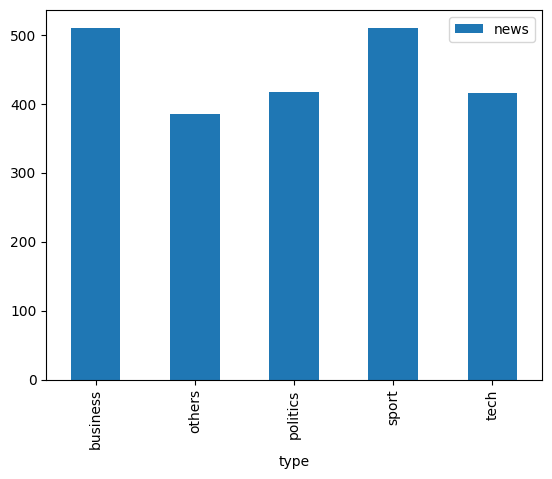

In [10]:
#Graphical representation
data.groupby('type').count().plot.bar(ylim=0)

In [14]:
#Extracting colums of dataset as list for further operation
x = data['news'].tolist()
y = data['type'].tolist()
print("Processing data...")
for index, value in enumerate(x):
    x[index] = ' '.join([Word(word).lemmatize() for word in clean_str(value).split()])

Processing data...


In [21]:
#Displaying first 100 characters after cleaning of text
x[1][:100]

'dollar gain on greenspan speech the dollar ha hit it highest level against the euro in almost three '

You can refer to given link to know how tfidf and other parameters work : https://developers.google.com/machine-learning/guides/text-classification/step-3

In [22]:
#Used tfidf  for vectrization as it gives importance to context besides frequency of words in document
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
#Feel free to tune parameters, 
features = tfidf.fit_transform(data.news).toarray()
labels = data.type
features.shape


(2240, 14604)

In [23]:
#Just to remove a notebook warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
#Performance measures of different machine learning models
#Borrowed  from Model Evaluation section in 
#https://colab.research.google.com/drive/1JW2I6cU_ypfRXfIfqMPQwMEA6LzGav-Y#scrollTo=MPI84Fkoel-a

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=21),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

a=cv_df.groupby('model_name').accuracy.mean()
print(a)




model_name
LogisticRegression        0.970536
MultinomialNB             0.962500
RandomForestClassifier    0.826339
Name: accuracy, dtype: float64


In [25]:
#Since we have got maximum accuracy by Logistic Regression we would proceed with it.
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, val_train, val_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [26]:
y_pred_proba

array([[0.14980828, 0.43703916, 0.11386503, 0.17683846, 0.12244906],
       [0.04309403, 0.76188136, 0.04921712, 0.07781597, 0.06799152],
       [0.7300735 , 0.06023305, 0.04814235, 0.11526521, 0.04628589],
       ...,
       [0.90944161, 0.01755151, 0.02111439, 0.01575   , 0.03614249],
       [0.8494322 , 0.03626301, 0.02567911, 0.04233432, 0.04629136],
       [0.04889256, 0.05134256, 0.79399063, 0.05083367, 0.05494058]])

In [27]:
#Training using LogisticRegression
model.fit(features, labels)

LogisticRegression(random_state=0)

In [28]:
#pickling our model
import pickle
with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

CONFUSION MATRIX
This matrix shows how much does actual output matches predicted output
Here 0,1,2,3,4 represents our classes 
So, 
   If we see [0,0] element it means that content of class '0' is predicted as class '0' 168 times
   Similarly [0,1] element means that content of class '0' is predicted as class '1' 0 times
   and so on...
So if maximum density is found on diagonal then every class is rightly predicted most of the times.

<Axes: >

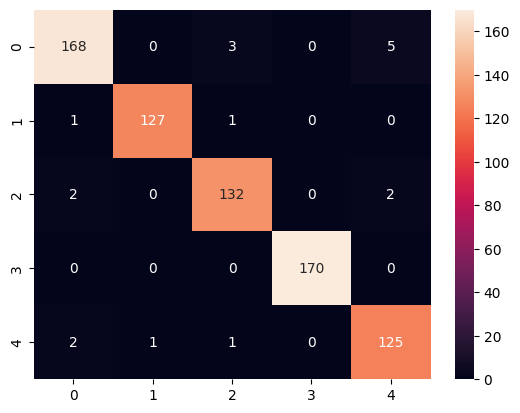

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')


In [31]:
notes_list = [
        "You won't guess what the latest trend in data analysis is!",
        "10 popular JS IDEs for java developers",
        "Dance was good!",
        "Stock prices have risen",
         "I have to complete my machine learning project in time",
         "Electronic have large usage now a days",
         "The Indian team won by 2 wickets and 45 run.",
         "The dancing show was awesome!",
         " wireless",
         "The Samsung galaxy S10+ seems address a lot of issues that users have with their existing devices. ",
         "Loosing yourself in online gaming",
         "Machine learning is fun!",
  "Today it will get you nearer €1.14. It has suffered a similar fate against most major currencies, losing about 15% of its value over that time"
        ,"Rohan has been on lot of shows and is a famous celebrity.",
        "Sachin tendulkar is a great batsman",
'''A high voter turnout, including over 80 per cent in Assam, was recorded in the third and largest phase of Lok Sabha elections Tuesday covering 116 constituencies amid complaints of EVM malfunctioning in many states and killing of a man outside a booth in West Bengal.

Election Commission officials in Delhi put the voting percentage at 65.61 at 8 pm. Final figures are likely to change as queues of voters were seen at several centres even after the scheduled time for voting ended.


Polling was also held in Anantnag seat in Jammu and Kashmir which saw a turnout of 13.61 per cent. Elections for this seat are being conducted in three phases. The driver of a vehicle carrying ITBP troops back from their poll duty in Kokarnag area of south Kashmir was killed as it overturned after a mob hurled stones at it, officials said. With Tuesday's polling, voting has been held in 302 Lok Sabha constituencies apart from Anantnag.


In Gujarat, a turnout of 63.67 per cent was registered for the 26 seats. Key political leaders, including Prime Minister Narendra Modi, BJP president Amit Shah, party veteran L K Advani, Union Finance Minister Arun Jaitley and Congress leader Ahmed Patel cast their votes at different places in the state. Shah is contesting from Gandhinagar seat.
''']
text_features = tfidf.transform(notes_list)
predictions = model.predict(text_features)
for text, predicted in zip(notes_list, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(predicted))
    
  print("")

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'

"10 popular JS IDEs for java developers"
  - Predicted as: 'tech'

"Dance was good!"
  - Predicted as: 'others'

"Stock prices have risen"
  - Predicted as: 'business'

"I have to complete my machine learning project in time"
  - Predicted as: 'tech'

"Electronic have large usage now a days"
  - Predicted as: 'tech'

"The Indian team won by 2 wickets and 45 run."
  - Predicted as: 'sport'

"The dancing show was awesome!"
  - Predicted as: 'others'

" wireless"
  - Predicted as: 'tech'

"The Samsung galaxy S10+ seems address a lot of issues that users have with their existing devices. "
  - Predicted as: 'tech'

"Loosing yourself in online gaming"
  - Predicted as: 'tech'

"Machine learning is fun!"
  - Predicted as: 'tech'

"Today it will get you nearer €1.14. It has suffered a similar fate against most major currencies, losing about 15% of its value over that time"
  - Predicted as: 'business'

"Roh

Preparing data for recommendation  of articles for our notes

In [33]:
dat = {'notes':notes_list}
df = pd.DataFrame(dat)
print('writing csv file...')
df.to_csv('notes.csv', index = False)

writing csv file...


In [20]:
keep=pd.read_csv('d:/machine learning/articles/notes.csv')
print(keep)
keepy=keep.notes.values
#Taking values of notes  as an array for maths operation

                                                notes
0   You won't guess what the latest trend in data ...
1              10 popular JS IDEs for java developers
2                                     Dance was good!
3                             Stock prices have risen
4   I have to complete my machine learning project...
5              Electronic have large usage now a days
6        The Indian team won by 2 wickets and 45 run.
7                       The dancing show was awesome!
8                                            wireless
9   The Samsung galaxy S10+ seems address a lot of...
10                  Loosing yourself in online gaming
11                           Machine learning is fun!
12  Today it will get you nearer €1.14. It has suf...
13  Rohan has been on lot of shows and is a famous...
14                Sachin tendulkar is a great batsman
15  A high voter turnout, including over 80 per ce...


We will be using this dataset for recommending articles: https://www.kaggle.com/snapcrack/all-the-news We're using articles3.csv from the dataset

Creating custom dataset so that we have less calculation and better result. We do that by classifying content from dataset(which is to be used for recommending articles) and forming specific datasets which only contains from a particular class => datasetA contains only tech articles and so on..

In [21]:
import pandas as pd
article3 = pd.read_csv('d:/machine learning/articles/allnews/articles3.csv')
article3

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...
5,103464,151914,My dad’s Reagan protests inspire me to stand u...,Guardian,Steven W Thrasher,2016-11-28,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,I have been battling depression and sleeplessn...
6,103465,151915,Flatmates of gay Syrian refugee beheaded in Tu...,Guardian,Patrick Kingsley,2016-08-07,2016.0,8.0,https://www.theguardian.com/world/2016/aug/07/...,Three flatmates of a gay Syrian refugee behead...
7,103466,151916,Jaffas and daredevils: life on the world’s ste...,Guardian,Eleanor Ainge Roy,2016-07-22,2016.0,7.0,https://www.theguardian.com/world/2016/jul/23/...,", Most people take 10 minutes to climb the wor..."
8,103467,151917,NSA contractor arrested for alleged theft of t...,Guardian,Ewen MacAskill,2016-10-05,2016.0,10.0,https://www.theguardian.com/us-news/2016/oct/0...,The FBI has arrested a National Security Agenc...
9,103468,151918,Donald Trump to dissolve his charitable founda...,Guardian,Ben Jacobs,2016-12-24,2016.0,12.0,https://www.theguardian.com/us-news/2016/dec/2...,Donald Trump announced on Saturday that he wil...


In [22]:
#Trying for creating a dataset based on tech
final_content=[]
final_url =[]
rec_data = pd.read_csv('d:/machine learning/articles/allnews/articles3.csv')
#or rec_data = article3
text_content = rec_data['content'].tolist()
url = rec_data['url'].tolist()
text_features = tfidf.transform(text_content)
predictions = model.predict(text_features)
for index,url_index,i in zip(text_content,url,predictions):
    if(i == 'tech'):
        final_content.append(index)
        final_url.append(url_index)
dataframe = {'content':final_content,'url':final_url}
df = pd.DataFrame(dataframe)
print('writing csv file...')
df.to_csv('d:/machine learning/articles/categorisation/tech.csv', index = False)

writing csv file...


In [23]:
#Trying for creating a dataset based on politics
final_content=[]
final_url =[]
rec_data = pd.read_csv('d:/machine learning/articles/allnews/articles3.csv')
text_content = rec_data['content'].tolist()
url = rec_data['url'].tolist()
text_features = tfidf.transform(text_content)
predictions = model.predict(text_features)
for index,url_index,i in zip(text_content,url,predictions):
    if(i == 'politics'):
        final_content.append(index)
        final_url.append(url_index)
dataframe = {'content':final_content,'url':final_url}
df = pd.DataFrame(dataframe)
print('writing csv file...')
df.to_csv('d:/machine learning/articles/categorisation/politics.csv', index = False)

writing csv file...


In [24]:
#Trying for creating a dataset based on others
final_content=[]
final_url =[]
rec_data = pd.read_csv('d:/machine learning/articles/allnews/articles3.csv')
text_content = rec_data['content'].tolist()
url = rec_data['url'].tolist()
text_features = tfidf.transform(text_content)
predictions = model.predict(text_features)
for index,url_index,i in zip(text_content,url,predictions):
    if(i == 'others'):
        final_content.append(index)
        final_url.append(url_index)
dataframe = {'content':final_content,'url':final_url}
df = pd.DataFrame(dataframe)
print('writing csv file...')
df.to_csv('d:/machine learning/articles/categorisation/others.csv', index = False)

writing csv file...


In [25]:
#Trying for creating a dataset based on business
final_content=[]
final_url =[]
rec_data = pd.read_csv('d:/machine learning/articles/allnews/articles3.csv')
text_content = rec_data['content'].tolist()
url = rec_data['url'].tolist()
text_features = tfidf.transform(text_content)
predictions = model.predict(text_features)
for index,url_index,i in zip(text_content,url,predictions):
    if(i == 'business'):
        final_content.append(index)
        final_url.append(url_index)
dataframe = {'content':final_content,'url':final_url}
df = pd.DataFrame(dataframe)
print('writing csv file...')
df.to_csv('d:/machine learning/articles/categorisation/biz.csv', index = False)

writing csv file...


In [26]:
#Trying for creating a dataset based on sports
final_content=[]
final_url =[]
rec_data = pd.read_csv('d:/machine learning/articles/allnews/articles3.csv')
text_content = rec_data['content'].tolist()
url = rec_data['url'].tolist()
text_features = tfidf.transform(text_content)
predictions = model.predict(text_features)
for index,url_index,i in zip(text_content,url,predictions):
    if(i == 'sport'):
        final_content.append(index)
        final_url.append(url_index)
dataframe = {'content':final_content,'url':final_url}
df = pd.DataFrame(dataframe)
print('writing csv file...')
df.to_csv('d:/machine learning/articles/categorisation/sport.csv', index = False)

writing csv file...


In [22]:
#Reading each of the specifically formed dataset 
tech_csv=pd.read_csv('d:/machine learning/articles/categorisation/tech.csv')
politics_csv=pd.read_csv('d:/machine learning/articles/categorisation/politics.csv')
sports_csv=pd.read_csv('d:/machine learning/articles/categorisation/sport.csv')
biz_csv=pd.read_csv('d:/machine learning/articles/categorisation/biz.csv')
others_csv=pd.read_csv('d:/machine learning/articles/categorisation/others.csv')






In [21]:
#Showing how each of customized dataset is formed
# Showing  tech_csv
tech_csv

,content,url
0,The FBI has arrested a National Security Agenc...,https://www.theguardian.com/us-news/2016/oct/0...
1,"Once you’ve mastered the basics of Pokémon Go,...",https://www.theguardian.com/technology/2016/ju...
2,Elon Musk’s rockets usually do not stray beyon...,https://www.theguardian.com/technology/2016/ju...
3,When Elon Musk isn’t outlining plans to use hi...,https://www.theguardian.com/technology/2016/oc...
4,"After a century of shooing away hunters, tendi...",https://www.theguardian.com/environment/2016/a...
5,A Chicago man was shot and killed while live s...,https://www.theguardian.com/technology/2016/ju...
6,"What has been seen, the saying goes, cannot be...",https://www.theguardian.com/artanddesign/2016/...
7,HBO host John Oliver achieved the destruction ...,https://www.theguardian.com/us-news/2016/oct/0...
8,The lawsuit filed by the wife of Donald Trump ...,https://www.theguardian.com/us-news/2016/sep/0...
9,What is happening with the Chinese space stati...,https://www.theguardian.com/science/2016/sep/2...


RECOMMENDATION PART BEGINS FROM HERE...

In [23]:
#Spliting the data
from sklearn.utils import shuffle

#For checking similarity of our note with the articles available
from sklearn.metrics.pairwise import cosine_similarity



In [24]:
#Choosing a particular note from the user, for recommendation
#Lets make it arbitrary for a note chosen to be operated for recommendation
#Simplifying it by asking user to choose an index less than length of total notes
print(keep)
print("\n\n Now choose an index of the note you want to know recommendations for:")
user_choice = int(input("\n Enter a number \n"))
print("\nThe note is :   ",keep.notes[user_choice])

#Performing classification for that note to find similarity in that classification only 
temp = []
temp.append(notes_list[user_choice])
temp_features = tfidf.transform(temp)
predictions = model.predict(temp_features)
target_csv =''
for predict in predictions:
    if(predict == 'tech'):
        target_csv = tech_csv
    if(predict == 'others'):
        target_csv = others_csv
    if(predict == 'politics'):
        target_csv = politics_csv
    if(predict == 'business'):
        target_csv = biz_csv
    if(predict == 'sport'):
        target_csv = sports_csv
    


                                                notes
0   You won't guess what the latest trend in data ...
1              10 popular JS IDEs for java developers
2                                     Dance was good!
3                             Stock prices have risen
4   I have to complete my machine learning project...
5              Electronic have large usage now a days
6        The Indian team won by 2 wickets and 45 run.
7                       The dancing show was awesome!
8                                            wireless
9   The Samsung galaxy S10+ seems address a lot of...
10                  Loosing yourself in online gaming
11                           Machine learning is fun!
12  Today it will get you nearer €1.14. It has suf...
13  Rohan has been on lot of shows and is a famous...
14                Sachin tendulkar is a great batsman
15  A high voter turnout, including over 80 per ce...


 Now choose an index of the note you want to know recommendations for:

 Enter a

In [25]:
# move articles to an array
articles = target_csv.content.values

# move article web_urls to an array
web_url = target_csv.url.values

# shuffle these two arrays 
articles, web_url = shuffle(articles,web_url, random_state=4)

In [26]:
n=10
xtrain = articles[:]
xtrain_urls = web_url[:]
print(xtrain_urls)


['https://web.archive.org/web/20160924002636/https://www.washingtonpost.com/opinions/and-the-oscars-for-good-government-geeks-go-to-/2016/09/23/2666552a-81b2-11e6-8327-f141a7beb626_story.html\r\n'
 'http://www.npr.org/sections/alltechconsidered/2016/09/14/493823483/self-driving-cars-take-to-the-streets-of-pittsburgh-courtesy-of-uber'
 'http://www.npr.org/sections/13.7/2016/01/12/462753762/paris-climate-agreement-success-or-failure'
 ...
 'http://www.npr.org/sections/ed/2016/08/06/487620412/scientific-secrets-to-keep-kids-in-college'
 'https://www.theguardian.com/commentisfree/2016/oct/01/smartphones-exploding-handset'
 'http://www.npr.org/sections/13.7/2017/05/11/527533776/buddhism-and-science']


In [27]:
type(xtrain)

numpy.ndarray

In [28]:
x_test = keepy

In [29]:
tfidf.fit(xtrain)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='latin-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [30]:
xtrain_tfidf = tfidf.transform(xtrain) 


In [31]:
#n = 5 is deafault values for number of similar articles to be found, if n= 7 is passed then 7 similar articles would be found
def top_articles(xtrain_tfidf, xtrain, texts,xtrain_urls,n=5):
    
    similarity_scores = xtrain_tfidf.dot(texts.toarray().T)
    #Calculating similarity between notes and articles and scores are stored
    
    sorted_indices = np.argsort(similarity_scores, axis = 0)[::-1]
    
    sorted_scores =similarity_scores[sorted_indices]
    
    #get n topmost similar articles
    top_rec = xtrain[sorted_indices[:n]]
    
    #get top n corresponding urls
    rec_urls = xtrain_urls[sorted_indices[:n]]
    
    return top_rec, rec_urls,sorted_scores
    
    

In [32]:
#To convert data into same form as by learnt by our model
test_tfidf=tfidf.transform(keepy)

#Passing the particular note as asked by User
test_notes = test_tfidf[user_choice]

#Accepting values from top_articles function 
top_recommendations, recommended_urls, sorted_sim_scores = top_articles(xtrain_tfidf, xtrain, test_notes,xtrain_urls,5)

In [33]:
x_test[user_choice]

'Machine learning is fun!'

In [34]:
#Checking the topmost recommended article
a = top_recommendations[0]
a

array([' Open up the photo app on your phone and search “dog,” and all the pictures you have of dogs will come up. This was no easy feat. Your phone knows what a dog “looks” like.     This and other   marvels are the result of machine learning. These are programs that comb through millions of pieces of data and start making correlations and predictions about the world. The appeal of these programs is immense: These machines can use cold, hard data to make decisions that are sometimes more accurate than a human’s. But know: Machine learning has a dark side. “Many people think machines are not biased,” Princeton computer scientist Aylin Caliskan says. “But machines are trained on human data. And humans are biased. ”  Computers learn how to be racist, sexist, and prejudiced in a similar way that a child does, Caliskan explains: from their creators.     We think artificial intelligence is impartial. Often, it’s not.  Nearly all new consumer technologies use machine learning in some way. Li

In [35]:
type(top_recommendations)

numpy.ndarray

In [36]:
#Finally diplaying recommended articles for a particular note by user
print("Recommended Urls for \n {0}\n \n {1} ".format(keepy[user_choice],recommended_urls))

Recommended Urls for 
 Machine learning is fun!
 
 [['http://www.vox.com/science-and-health/2017/4/17/15322378/how-artificial-intelligence-learns-how-to-be-racist']
 ['http://www.vox.com/science-and-health/2016/12/29/13967966/machine-learning-neuroscience']
 ['http://www.vox.com/2016/4/30/11520216/artificial-intelligence-nature']
 ['https://www.theguardian.com/us-news/2016/oct/08/pittsburgh-thriving-tech-sector-new-life']
 ['http://www.npr.org/sections/thetwo-way/2016/12/06/504570582/amazon-to-open-convenience-store-with-no-lines']] 
